# Plant Disease Classifier using Convolutional Neural Netwroks 
CNN architecture follows the architecture of AlexNet.

* Convolution Layers - 5
* Max Pooling Layers - 3
* Activation Function - ReLu

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

### Data Preprocessing
We wil be using ImageDataGenerator which will generate batches of tensor image data with real-time data augmentation.
* Batch Size - 32

In [2]:
# ImageDataGenerator for training dataset
train_gen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [3]:
# ImageDataGenerator for validation dataset
valid_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# ImageDataGenerator for test dataset
test_gen = ImageDataGenerator(rescale=1./255)

In [5]:
batch_size = 32
train_data_dir = "data-split/train"
valid_data_dir = "data-split/valid"
test_data_dir = "data-split/test"

In [6]:
# Getting the data and assiging labels for categories
training_set = train_gen.flow_from_directory(train_data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_gen.flow_from_directory(valid_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

test_set = test_gen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

print(training_set.class_indices)

Found 2536 images belonging to 4 classes.
Found 319 images belonging to 4 classes.
Found 316 images belonging to 4 classes.
{'Apple-Scab': 0, 'Black-Rot': 1, 'Cedar-Apple-Rust': 2, 'Healthy': 3}


### Building the Model

[Conv -> Pool] -> [Conv -> Pool] -> [Conv] -> [Conv] -> [Conv -> Pool] -> Flatten -> Full Connection

In [7]:
# Initializing the model
model = Sequential()

In [8]:
# Convolution Layer 
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Layer 
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

# Batch Normalization 
model.add(BatchNormalization())

In [9]:
# Convolution Layer 
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Layer 
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))

# Batch Normalization
model.add(BatchNormalization())

In [10]:
# Convolution Layer 
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))

# Batch Normalization
model.add(BatchNormalization())

In [11]:
# Convolution Layer 
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))

# Batch Normalization
model.add(BatchNormalization())

In [12]:
# Convolution Layer 
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Layer 
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

# Batch Normalization
model.add(BatchNormalization())

In [13]:
# Flattening Step
model.add(Flatten())

In [14]:
# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 4, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [16]:
# Compile the model
model.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

### Fitting data to CNN Model
* Batch Size - 32
* Epochs - 25
* Step size - 79

In [17]:
history = model.fit(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=valid_set,
                                   epochs=25,
                                   validation_steps=valid_set.samples//batch_size)

Epoch 1/25
79/79 [==============================] - 153s 2s/step - loss: 1.3906 - accuracy: 0.4945 - val_loss: 1.5413 - val_accuracy: 0.4688
Epoch 2/25
79/79 [==============================] - 143s 2s/step - loss: 1.1160 - accuracy: 0.5990 - val_loss: 1.0946 - val_accuracy: 0.5382
Epoch 3/25
79/79 [==============================] - 142s 2s/step - loss: 1.0133 - accuracy: 0.6250 - val_loss: 0.8574 - val_accuracy: 0.6285
Epoch 4/25
79/79 [==============================] - 139s 2s/step - loss: 0.9458 - accuracy: 0.6562 - val_loss: 0.7219 - val_accuracy: 0.7257
Epoch 5/25
79/79 [==============================] - 145s 2s/step - loss: 0.8943 - accuracy: 0.6833 - val_loss: 0.6447 - val_accuracy: 0.7500
Epoch 6/25
79/79 [==============================] - 138s 2s/step - loss: 0.8801 - accuracy: 0.6825 - val_loss: 0.5881 - val_accuracy: 0.7361
Epoch 7/25
79/79 [==============================] - 137s 2s/step - loss: 0.8380 - accuracy: 0.6841 - val_loss: 0.5540 - val_accuracy: 0.7951
Epoch 8/25
79

In [18]:
# Save the model 
filepath="model-cnn.hdf5"
model.save(filepath)

### Evaluating the Model

In [19]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

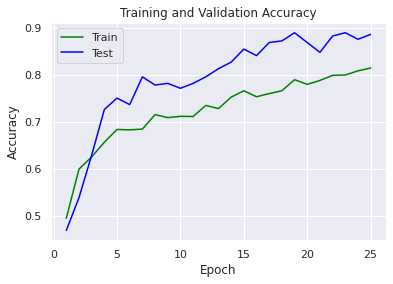

In [20]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

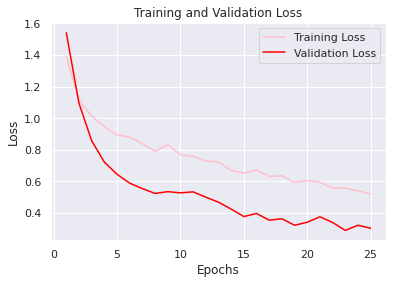

In [21]:
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Evaluating Test Set

In [29]:
results = model.evaluate(test_set, steps=test_set.samples//batch_size)

9/9 [==============================] - 2s 227ms/step - loss: 0.3378 - accuracy: 0.8627


In [33]:
print("Accuracy = {:2f}".format(results[1]*100))

Accuracy = 86.267608
